# module06_text_processing


## chunking.py
chunking.py
Explanation of Chunking
Chunking is the process of breaking down large documents into smaller, manageable pieces.
This is essential for RAG systems as LLMs have token limits and work better with focused content.
Proper chunking balances context preservation with retrieval efficiency.
LangChain text splitting - popular library for text processing in RAG


In [1]:
def langchain_chunking_example():
    """
    Example using LangChain for text chunking.
    LangChain provides various text splitters optimized for different use cases.
    """
    try:
        from langchain.text_splitter import CharacterTextSplitter, RecursiveCharacterTextSplitter

        # Sample text about RAG to demonstrate chunking
        text = """
        Retrieval Augmented Generation (RAG) is a technique that combines the power of retrieval systems
        with generative AI to provide more accurate and contextually relevant responses. It works by
        first retrieving relevant information from a knowledge base, then using that information to
        guide the generation of responses by a large language model.

        The process typically involves:
        1. Converting documents to embeddings
        2. Storing embeddings in a vector database
        3. For a user query, finding similar documents
        4. Providing retrieved documents as context to the LLM

        This approach helps overcome some limitations of LLMs, such as outdated knowledge and lack of specific domain expertise.
        """

        # Character-based splitting with paragraph separators
        # Splits on double newlines first, then falls back to chunk_size
        char_splitter = CharacterTextSplitter(
            separator="\n\n",      # Primary separator (paragraph breaks)
            chunk_size=200,       # Maximum characters per chunk
            chunk_overlap=50      # Characters to overlap between chunks
        )
        # Split the text into chunks
        char_chunks = char_splitter.split_text(text)

        # Display character-based splitting results
        print("LangChain Character Splitting:")
        for i, chunk in enumerate(char_chunks, 1):
            print(f"Chunk {i}: {len(chunk)} chars")
            print(f"Content: {chunk[:100]}...")
            print()

        # Recursive character splitting - more sophisticated approach
        # Tries multiple separators in order: paragraphs, sentences, words, characters
        recursive_splitter = RecursiveCharacterTextSplitter(
            separators=["\n\n", "\n", " ", ""],  # Hierarchy of separators to try
            chunk_size=150,     # Smaller chunks for this example
            chunk_overlap=30    # Smaller overlap
        )
        # Split using recursive approach
        recursive_chunks = recursive_splitter.split_text(text)

        # Display recursive splitting results
        print("LangChain Recursive Splitting:")
        for i, chunk in enumerate(recursive_chunks, 1):
            print(f"Chunk {i}: {len(chunk)} chars")
            print(f"Content: {chunk[:80]}...")
            print()

    except ImportError:
        print("LangChain not installed. Install with: pip install langchain")

In [2]:
def spacy_chunking_example():
    """
    Example using spaCy for text chunking based on linguistic features.
    spaCy provides advanced NLP capabilities for understanding text structure.
    """
    try:
        import spacy

        # Load English language model (requires download)
        nlp = spacy.load("en_core_web_sm")

        # Short sample text for demonstration
        text = "Retrieval Augmented Generation combines retrieval and generation. It uses external knowledge to improve LLM responses."

        # Process text through spaCy pipeline to get linguistic analysis
        doc = nlp(text)

        # Sentence-based chunking using spaCy's sentence segmentation
        sentences = [sent.text for sent in doc.sents]
        print("spaCy Sentence Chunking:")
        for i, sent in enumerate(sentences, 1):
            print(f"Sentence {i}: {sent}")

        # Extract noun phrases as meaningful chunks
        # Noun phrases represent key concepts and entities
        noun_phrases = [chunk.text for chunk in doc.noun_chunks]
        print("\nNoun Phrases:")
        for phrase in noun_phrases:
            print(f"- {phrase}")

    except ImportError:
        print("spaCy not installed. Install with: pip install spacy")
        print("Also need to download model: python -m spacy download en_core_web_sm")

In [3]:
def custom_chunking(text, chunk_size=200, overlap=50):
    """
    Simple character-based chunking with overlap.
    This demonstrates the basic principles of text chunking without external libraries.
    """
    # List to store the resulting chunks
    chunks = []
    # Starting position for chunking
    start = 0

    # Continue chunking until we've covered the entire text
    while start < len(text):
        # Calculate end position for this chunk
        end = start + chunk_size
        # Extract the chunk
        chunk = text[start:end]

        # If not at the end of text, try to break at sentence boundaries
        if end < len(text):
            # Look for sentence endings in the last 100 characters of chunk
            last_period = chunk.rfind('.')
            last_question = chunk.rfind('?')
            last_exclamation = chunk.rfind('!')

            # Find the latest sentence ending
            break_point = max(last_period, last_question, last_exclamation)
            # If break point is reasonable (not too early in chunk), use it
            if break_point > chunk_size - 100:  # If break point is reasonable
                end = start + break_point + 1
                chunk = text[start:end]

        # Add the chunk to results (strip whitespace)
        chunks.append(chunk.strip())
        # Move start position with overlap for next chunk
        start = end - overlap

    # Return the list of text chunks
    return chunks

In [4]:
# Example usage of custom chunking
sample_text = """
RAG systems work by retrieving relevant information from a knowledge base before generating responses. This retrieval step helps ground the generation in factual information, reducing hallucinations and improving accuracy. The retrieved documents are typically provided as context to the language model, which then generates a response based on both the query and the retrieved information.
"""


In [5]:
print("Custom Chunking:")
chunks = custom_chunking(sample_text, chunk_size=150, overlap=30)
for i, chunk in enumerate(chunks, 1):
    print(f"Chunk {i} ({len(chunk)} chars): {chunk[:60]}...")


Custom Chunking:
Chunk 1 (102 chars): RAG systems work by retrieving relevant information from a k...
Chunk 2 (150 chars): e before generating responses. This retrieval step helps gro...
Chunk 3 (149 chars): ations and improving accuracy. The retrieved documents are t...
Chunk 4 (78 chars): en generates a response based on both the query and the retr...


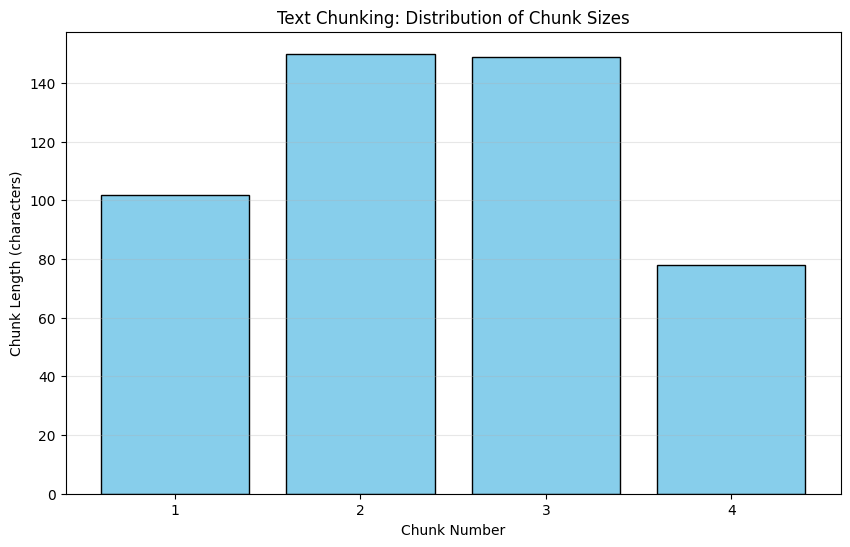

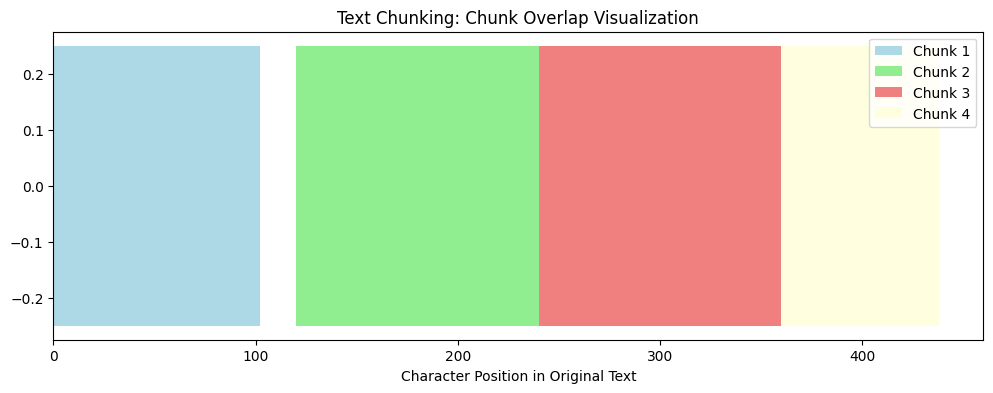

In [6]:
import matplotlib.pyplot as plt

# Visualize chunk sizes
chunk_lengths = [len(chunk) for chunk in chunks]
chunk_numbers = list(range(1, len(chunks) + 1))

plt.figure(figsize=(10, 6))
plt.bar(chunk_numbers, chunk_lengths, color='skyblue', edgecolor='black')
plt.xlabel('Chunk Number')
plt.ylabel('Chunk Length (characters)')
plt.title('Text Chunking: Distribution of Chunk Sizes')
plt.xticks(chunk_numbers)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Also show overlap visualization
plt.figure(figsize=(12, 4))
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink']
for i, chunk in enumerate(chunks):
    start_pos = i * (150 - 30)  # Approximate position considering overlap
    plt.barh(0, len(chunk), left=start_pos, height=0.5, color=colors[i % len(colors)], label=f'Chunk {i+1}')

plt.xlabel('Character Position in Original Text')
plt.title('Text Chunking: Chunk Overlap Visualization')
plt.legend()
plt.show()

Overview of different chunking strategies:
- Fixed size: Simple but may break sentences - good for basic use cases
- Sentence-based: Respects linguistic boundaries - preserves meaning
- Paragraph-based: Preserves document structure - maintains context
- Semantic: Based on topic changes (more advanced) - requires ML models


Best practices for effective chunking in RAG systems:
- Consider LLM token limits (typically 4096-8192 tokens)
- Balance chunk size vs. retrieval precision (smaller chunks = more precise retrieval)
- Include overlap to maintain context across chunk boundaries
- Experiment with different strategies for your specific use case and data
